<a href="https://colab.research.google.com/github/amisha1106/Machine-Learning/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Step 1: Load the California housing dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

In [4]:
# Step 2: Exploratory Data Analysis (Optional)
print(df.head())
print(df.describe())
print("\nMissing values:\n", df.isnull().sum())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

In [5]:
# Step 3: Feature-Target Split
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [6]:
# Step 4: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Step 6: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Step 7: Evaluate the model
y_pred = model.predict(X_test)
print("\nModel Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Model Performance:
Mean Squared Error: 0.555891598695244
R² Score: 0.5757877060324511


In [10]:
# Coefficient Interpretation
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nFeature Coefficients:\n", coeff_df)


Feature Coefficients:
             Coefficient
MedInc         0.852382
HouseAge       0.122382
AveRooms      -0.305116
AveBedrms      0.371132
Population    -0.002298
AveOccup      -0.036624
Latitude      -0.896635
Longitude     -0.868927


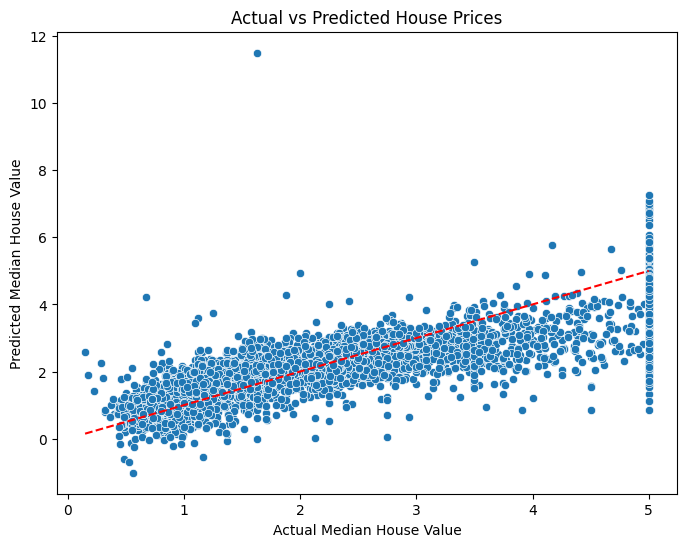

In [11]:
# Step 8: Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [13]:
# Step 9:User Input for Prediction
print("Predict House Price from Your Input")
try:
    # Get input for each feature
    MedInc = float(input("1. Median income in block (MedInc): "))
    HouseAge = float(input("2. Median house age (HouseAge): "))
    AveRooms = float(input("3. Average rooms (AveRooms): "))
    AveBedrms = float(input("4. Average bedrooms (AveBedrms): "))
    Population = float(input("5. Block population: "))
    AveOccup = float(input("6. Average occupancy (AveOccup): "))
    Latitude = float(input("7. Latitude(32.5 to 42.0): "))
    Longitude = float(input("8. Longitude(-124.3 to -114.3): "))

    # Create DataFrame
    user_input = pd.DataFrame([[MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]],
                              columns=california.feature_names)

    # Scale using the same scaler
    user_input_scaled = scaler.transform(user_input)

    # Predict
    prediction = model.predict(user_input_scaled)
    print(f"Predicted Median House Value: ${prediction[0]*100000:.2f}")

except Exception as e:
    print("Error during input or prediction:", e)

Predict House Price from Your Input
1. Median income in block (MedInc): 9
2. Median house age (HouseAge): 4
3. Average rooms (AveRooms): 6
4. Average bedrooms (AveBedrms): 2
5. Block population: 500
6. Average occupancy (AveOccup): 10
7. Latitude(32.5 to 42.0): 36
8. Longitude(-124.3 to -114.3): -118
Predicted Median House Value: $390878.74
